# Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # import the k-means algorithm from scikit-learn.
# The numerical data has too much variation so we need to scale the data using Principal Components Analysis (PCA) and StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline


In [4]:
#import pickle file

path =  r'/Users/isomwinton/Desktop/Desktop - Isom’s MacBook Pro/Career Foundry/Data Immersion/Achievement 6/USA Real Estate Analysis 03-2024'
usa = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'real_estate_cleaned_3-13-2024.pkl'))


In [5]:
usa.shape

(93047, 11)

In [6]:
usa.head()

status  bed  bath  acre_lot           city        state zip_code  \
0  for_sale  3.0   2.0      0.12       Adjuntas  Puerto Rico    00601   
1  for_sale  4.0   2.0      0.08       Adjuntas  Puerto Rico    00601   
2  for_sale  2.0   1.0      0.15     Juana Diaz  Puerto Rico    00795   
3  for_sale  4.0   2.0      0.10          Ponce  Puerto Rico    00731   
5  for_sale  4.0   3.0      0.46  San Sebastian  Puerto Rico    00612   

   house_size prev_sold_date     price      price_category  
0       920.0            NaT  105000.0          Affordable  
1      1527.0            NaT   80000.0  Low-end Affordable  
2       748.0            NaT   67000.0  Low-end Affordable  
3      1800.0            NaT  145000.0          Affordable  
5      2520.0            NaT  179000.0          Affordable

In [7]:
#create a new dataframe with only the numerical variables to run k-means

k_means_variables =  ['bed', 'bath', 'acre_lot', 'house_size', 'price']
k_usa = usa[k_means_variables].copy()

#.copy() ensures that new_dataframe is a separate copy and modifying it will not affect the original usa DataFrame.

# Combining PCA and K-Means to Standardize Data
I referenced the article below that was provided by CareerFoundry to understand the PCA and K-means analysis process to implement them for my data analysis. 
https://365datascience.com/tutorials/python-tutorials/pca-k-means/

## Standardizing the data

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(k_usa)

## Dimensionality Reduction with PCA

In [9]:
#PCA Process
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [10]:
# Display how much variance is explained by each of the 5 variable in the original k_usa dataframe
pca.explained_variance_ratio_

array([0.51541404, 0.20118541, 0.14621403, 0.08091411, 0.05627242])

Text(0, 0.5, 'Cumulative Explained Variance')

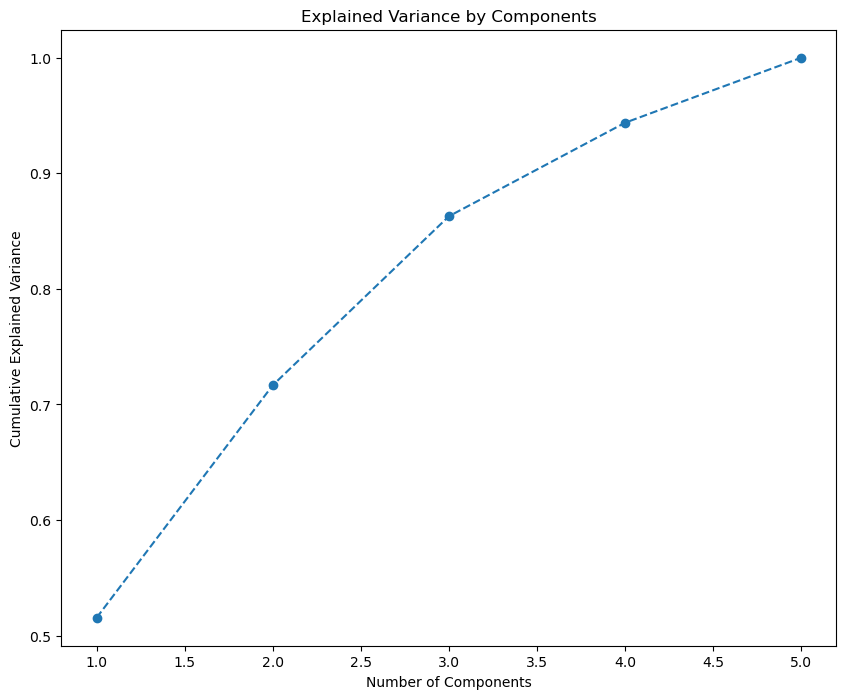

In [11]:
plt.figure(figsize = (10,8))
plt.plot(range(1,6), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [12]:
# We will choose 3 components based on the figure above as it will include about 87% variance. 
pca = PCA(n_components = 3)

In [13]:
# Fit the model in our k_usa data with the selected number of components
pca.fit(segmentation_std)

PCA(n_components=3)

In [14]:
# View the components scores
pca.transform(segmentation_std)

array([[-1.49401456, -0.35634033,  0.23714506],
       [-0.76853745, -0.6171363 ,  0.87721077],
       [-2.5510293 , -0.07387988, -0.11857699],
       ...,
       [-1.33761236, -0.61870861,  0.92561165],
       [ 1.13489955, -0.39993519,  0.07305877],
       [ 0.41716459, -0.25603482,  0.12749917]])

In [15]:
#The scores will be incorporated in our k_means analysis
scores_pca = pca.transform(segmentation_std)

## The Elbow Method for Deciding Number of Clusters for K-means

In [20]:
#K-means clustering with PCA
#We fit the k-means using the transformed data from the PCA
#'WCSS' = Within Cluster Sum of Squares 

wcss = []
for i in range (1,11):
    kmeans_pca = KMeans(n_clusters = i, init ='k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/isomwinton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

Text(0, 0.5, 'K-Means with PCA Clustering')

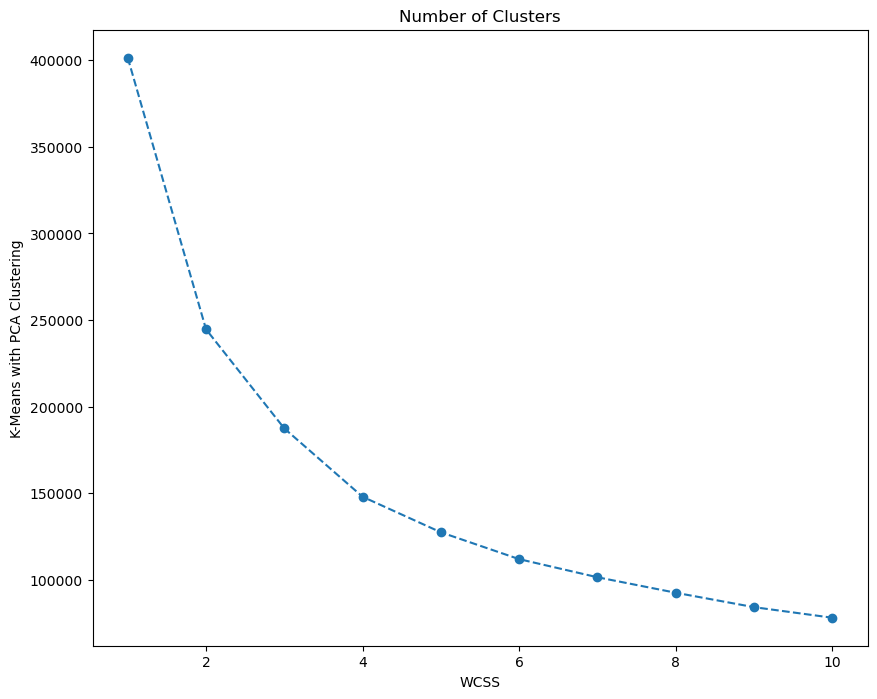

In [21]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker ='o', linestyle = '--')
plt.title('Number of Clusters')
plt.xlabel('WCSS')
plt.ylabel('K-Means with PCA Clustering')

### Based on this graph we will keep 4 clusters for our K-Means analysis

## Implement the K-Means algorithm

In [24]:
# Will run the analysis with the 4 clusters with same initializer and random state as above
kmeans_pca =KMeans(n_clusters = 4, init ='k-means++', random_state = 42)

In [25]:
# Fit the data with k-means pca model
kmeans_pca.fit(scores_pca)

/Users/isomwinton/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

## Analyze the results

In [26]:
# Create a new dataframe with orginal variables, add component and cluster variables to see the results in the new data frame
usa_std_pca_kmeans = pd.concat([k_usa.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
usa_std_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

# Add the k-means cluster label
usa_std_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [27]:
usa_std_pca_kmeans.head()

bed  bath  acre_lot  house_size     price  Component 1  Component 2  \
0  3.0   2.0      0.12       920.0  105000.0    -1.494015    -0.356340   
1  4.0   2.0      0.08      1527.0   80000.0    -0.768537    -0.617136   
2  2.0   1.0      0.15       748.0   67000.0    -2.551029    -0.073880   
3  4.0   2.0      0.10      1800.0  145000.0    -0.510869    -0.586038   
4  4.0   3.0      0.46      2520.0  179000.0     0.554339    -0.329673   

   Component 3  Segment K-Means PCA  
0     0.237145                    0  
1     0.877211                    0  
2    -0.118577                    0  
3     0.782211                    0  
4     0.808854                    3

In [28]:
# Add the names of the segments for our graph
usa_std_pca_kmeans['Segment'] = usa_std_pca_kmeans['Segment K-Means PCA'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth'})


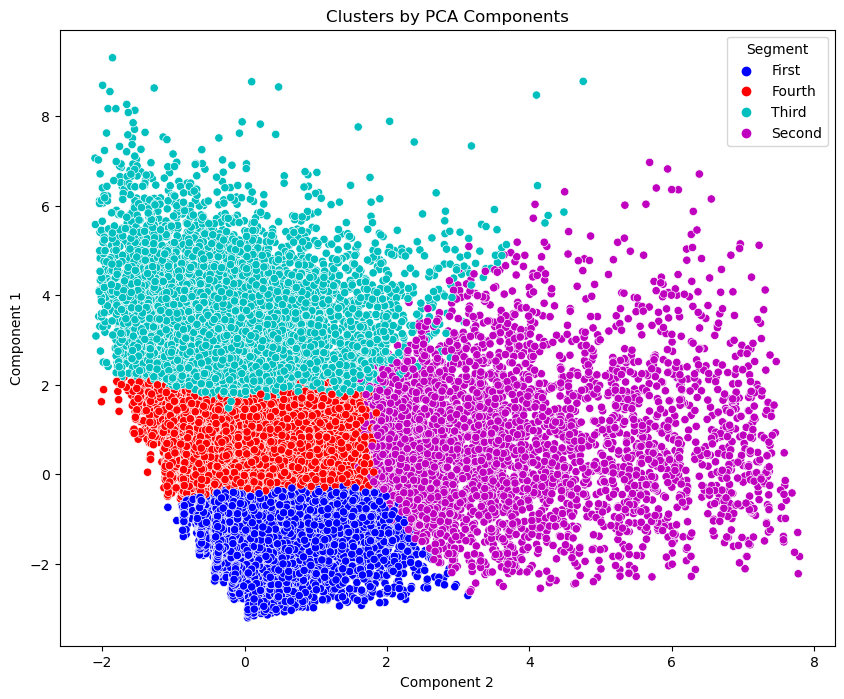

In [29]:
# Create a graph to view the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 2', y='Component 1', hue='Segment', data=usa_std_pca_kmeans, palette=['b', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()


## Use the K-Means Algorithm to Plot Different Variables

In [30]:
usa_std_pca_kmeans['Cluster'] = kmeans_pca.labels_

### Price vs House Size

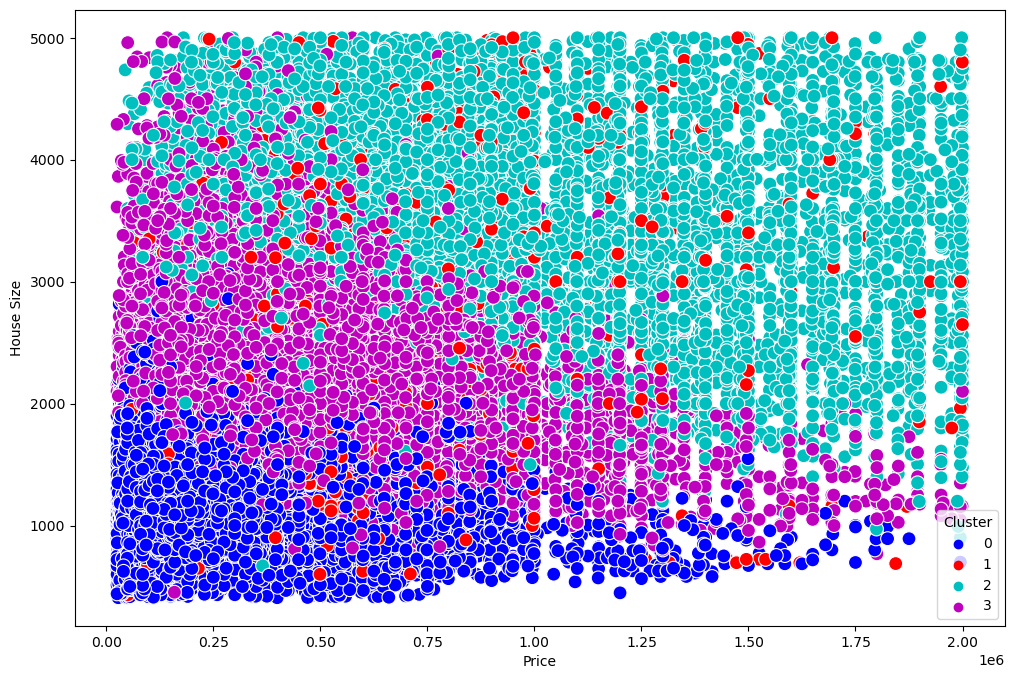

In [31]:
# Ensure k-means cluster labels are accurate to plot the algorithm for various variables in the dataset.
usa_std_pca_kmeans['Cluster'] = kmeans_pca.labels_

# Plot  'price' and 'house_size' using seaborn's scatterplot:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='price', y='house_size', hue='Cluster', data=usa_std_pca_kmeans, palette=['b', 'r', 'c', 'm'], s=100)
ax.grid(False)  # Removes the grid from the background.
plt.xlabel('Price')  # Label x-axis.
plt.ylabel('House Size')  # Label y-axis.
plt.show()


The clusters for price vs house size do not show clear group variance as we see small units with high prices as well as big units with reasonable prices. 

### Price vs Bathrooms

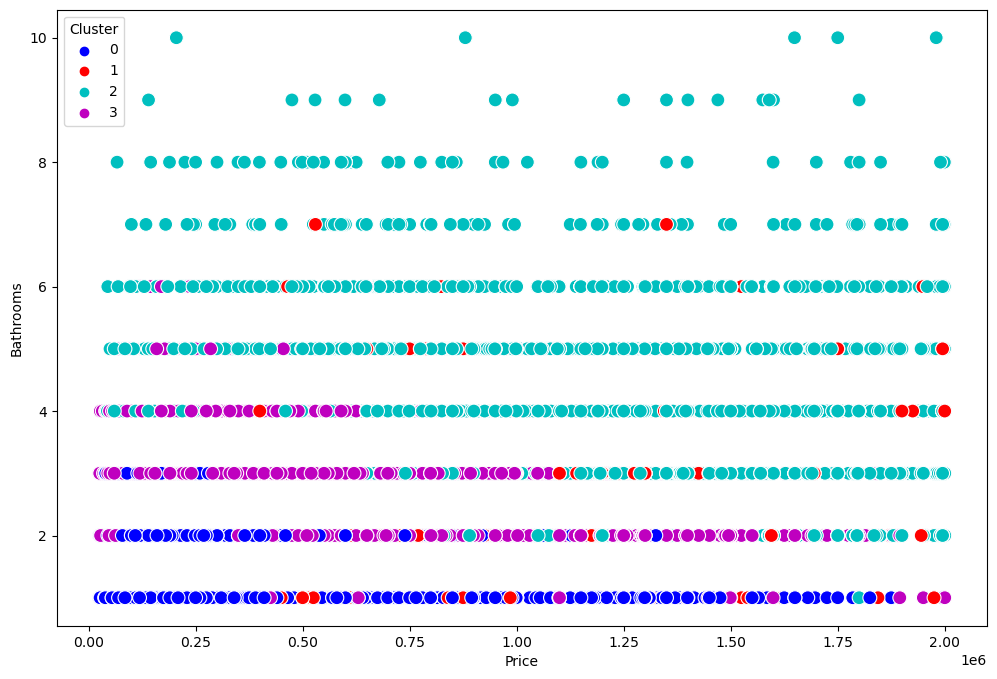

In [32]:
# Plot  'price' and 'bath' using seaborn's scatterplot:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='price', y='bath', hue='Cluster', data=usa_std_pca_kmeans, palette=['b', 'r', 'c', 'm'], s=100)
ax.grid(False)  # Removes the grid from the background.
plt.xlabel('Price')  # Label x-axis.
plt.ylabel('Bathrooms')  # Label y-axis.
plt.show()

### Price vs Number of Bedrooms

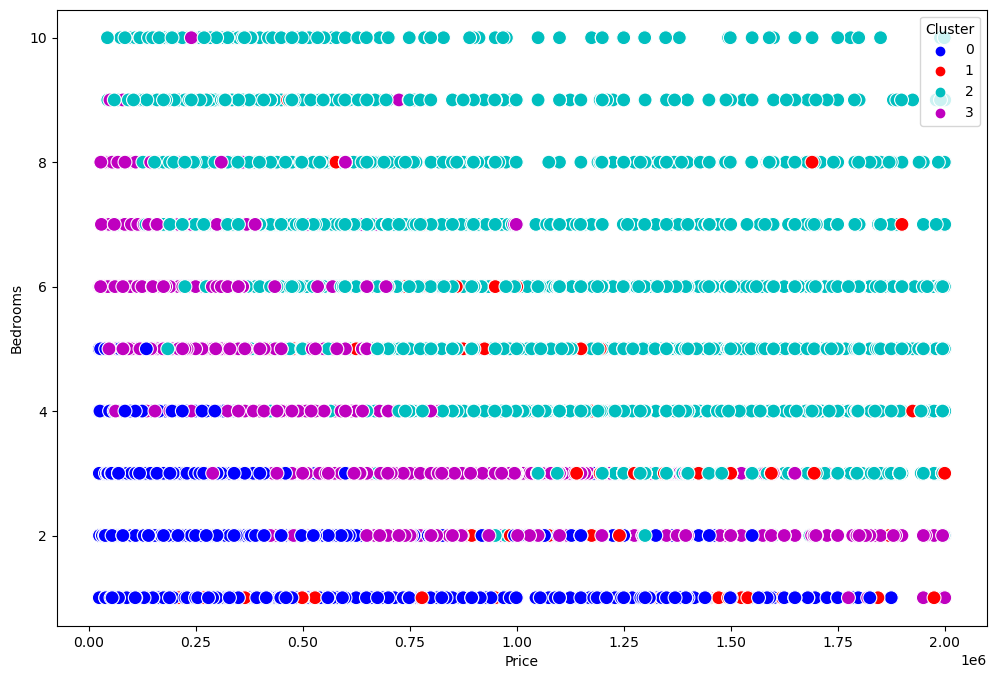

In [33]:
# Plot  'price' and 'bed' using seaborn's scatterplot:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='price', y='bed', hue='Cluster', data=usa_std_pca_kmeans, palette=['b', 'r', 'c', 'm'], s=100)
ax.grid(False)  # Removes the grid from the background.
plt.xlabel('Price')  # Label x-axis.
plt.ylabel('Bedrooms')  # Label y-axis.
plt.show()

From the cluster visuals above we can infer the number of bathrooms and bedrooms don't play a significant role in the price of homes suggesting our properties are focused in urban areas where space is limited and there are plenty of premium condos on the market. 

## Conduct descriptive analysis of each cluster

In [35]:
# First we need to use the loc function to relabel the clusters from numbers to color names

usa_std_pca_kmeans.loc[usa_std_pca_kmeans['Cluster'] == 3, 'Cluster'] = 'Magenta'
usa_std_pca_kmeans.loc[usa_std_pca_kmeans['Cluster'] == 2, 'Cluster'] = 'Teal'
usa_std_pca_kmeans.loc[usa_std_pca_kmeans['Cluster'] == 1, 'Cluster'] = 'Red'
usa_std_pca_kmeans.loc[usa_std_pca_kmeans['Cluster'] == 0, 'Cluster'] = 'Blue'

/var/folders/r1/45vn24q975v7qtz_2kj_sm740000gn/T/ipykernel_25482/3224802352.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Magenta' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  usa_std_pca_kmeans.loc[usa_std_pca_kmeans['Cluster'] == 3, 'Cluster'] = 'Magenta'


In [36]:
# Perform descriptive analysis on the variables by cluster groups

usa_std_pca_kmeans.groupby('Cluster').agg({'price':['mean', 'median'], 
                         'bed':['mean', 'median'], 'bath':['mean', 'median'],
                         'house_size':['mean', 'median'],
                          'acre_lot':['mean', 'median']})

price                 bed             bath         \
                  mean    median      mean median      mean median   
Cluster                                                              
Blue     253891.970354  219900.0  2.793175    3.0  1.630667    2.0   
Magenta  463383.426998  420000.0  3.843983    4.0  2.705262    3.0   
Red      479958.900509  419000.0  3.323155    3.0  2.491858    2.0   
Teal     955157.494244  875000.0  5.034701    5.0  3.941775    4.0   

          house_size          acre_lot         
                mean  median      mean median  
Cluster                                        
Blue     1329.933093  1302.0  0.345598   0.17  
Magenta  2226.342016  2163.0  0.452838   0.24  
Red      2226.102545  2112.0  5.507084   5.01  
Teal     3384.083917  3339.5  0.689317   0.33

### Based on the statistics above, the 'Red' group seems to provide better cost-performance in terms of getting more acres of land with about the same house size of the 'Magenta' cluster with similar price points. The 'Blue' and 'Teal' clusters seem to provide insight on urban properties with the 'Teal' group focusing on luxury properties. 

In [37]:
# Export usa kmeans data to pkl
usa_std_pca_kmeans.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'real_estate_kmeans_3-14-2024.pkl'))